# Zeitdiskreter Integrator # 
## P/N-Plan, Frequenzgang und Impulsantwort ##

Dieses Notebook demonstriert interaktiv wie sich die Eigenschaften eines zeitdiskreten Integrators in Abhängigkeit von seiner Dämpfungskonstante $\alpha$ ändern.

**Achtung:** Interaktive Widgets funktionieren unter JupyterLab nicht ohne weiteres; öffnen Sie das Notebook statt dessen im "klassischen" Jupyter Notebook Interface (`Help -> Launch Classic Notebook`).

In [1]:
import numpy as np
from numpy import (pi, log10, exp, sqrt, sin, cos, tan, angle, arange, 
                   linspace, array, zeros, ones)
import scipy.signal as sig

import matplotlib.pyplot as plt
%matplotlib inline 
from ipywidgets import (interact,FloatSlider,IntSlider,__version__)

import sys, os
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import dsp_fpga_lib as dsp
plt.rcParams.update(dsp.mpl_rc) # define plot properties 
print("ipywidgets:", __version__)

ipywidgets: 7.5.1


In [2]:
def filterIntegrator(alpha=0):
    b = [1, 0] #Zaehler: z
    a = [1, -alpha] #Nenner: z+alpha
    gridspecs = {'ncols':2, 'nrows':2}
    if(alpha == -1):
        print('Division by Zero!')
    else:
        fig, (ax1, ax2, ax3, ax4) = plt.subplots(2,2, figsize=(10,8)) # gridspec_kw=gs_specs
        ax1.set_title('PN-Plan (zplane)')
        dsp.zplane(b,a, plt_ax=ax1) #Plotte P/N Diagramm
        ax1.set_xlabel('$Re$') 
        ax1.set_ylabel('$Im$')

        #Frequenzgang H(f)
        ax2.set_title('Frequenzgang')
        f_S=1
        [W,H] = sig.freqz(b,a,1024)
        ax2.plot(W/(2*pi),abs(H),linewidth = 2)
        ax2.set_xlabel(r'$F$  bzw. $\Omega / 2 \pi$') 
        ax2.set_ylabel(r'$|H(F)| \; \rightarrow$')

        #Berechne 20 Werte der Impulsantwort:
        ax3.set_title('Impulsantwort')
        [himp,t] = dsp.impz(b,a,20,f_S)
        ax3.stem(t,himp,use_line_collection=True) # Impulsantwort
        ax3.set_xlabel('$n$'); ax3.set_ylabel(r'$h[n]$')

        #sicherstellen, dass Plots nicht überlappen
        fig.tight_layout()
        #plt.close()
        #plt.show; #Plot anzeigen

Der Integrator hat die folgende Systemfunktion:
$$H_i(z) = \frac{z}{z - \alpha} $$

Ändern Sie in der folgenden Zelle den Wert für alpha und führen Sie sie aus:

interactive(children=(FloatSlider(value=0.7, continuous_update=False, description='alpha', max=2.0, min=-2.0),…

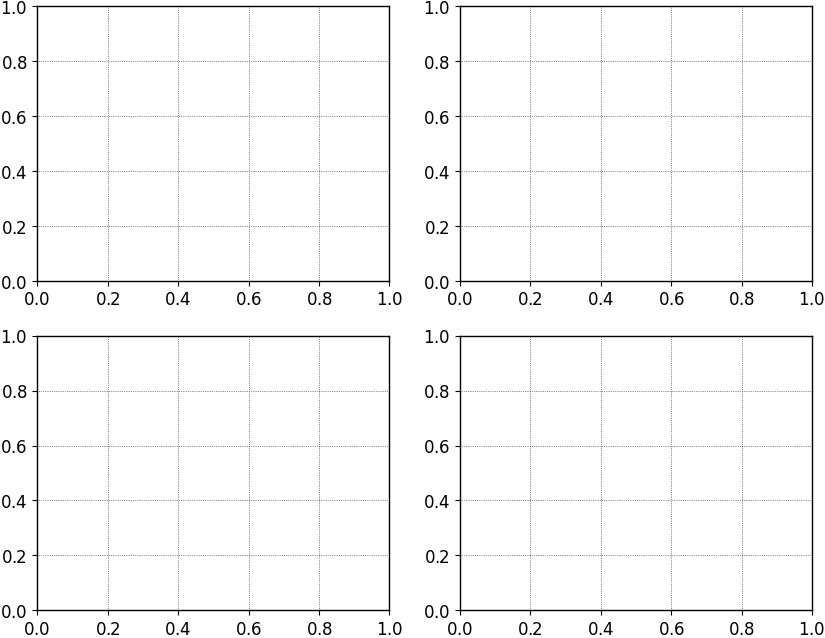

In [3]:
#Slider erzeugen, der filterIntegrator bei jeder Änderung aufruft
interact(filterIntegrator, alpha=FloatSlider(value=0.7,min=-2,max=2,step=0.1,continuous_update=False));
#filterIntegrator(alpha = 0.1)

### Aufgaben
- xxx

***
### Copyright

(c) 2016 - 2020 Rebecca Janßen and Prof. Dr. Christian Münker

This jupyter notebook is part of a collection of notebooks on various topics of Digital Signal Processing. The latest version can be found at https://github.com/chipmuenk/dsp_fpga "Digitale Signalverarbeitung auf FPGAs"

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebook for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Christian Münker, Digital Signal Processing auf FPGAs - Vorlesungsunterlagen mit Simulationsbeispielen, 2020*.